In [1]:
import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import pandas as pd

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    x1 = AF[:-2]
    y = AF[-2]
    w = AF[-1]
    x2 = data['CF']
    x = np.concatenate((x1, x2), axis=0)
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

2023-06-09 06:19:39.660474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [4]:
import matplotlib.pyplot as plt

In [10]:
print(xtrain)

            0         1         2         3         4         5         6   \
0    -0.544833 -0.590662 -0.626010 -0.376067 -0.258656 -1.120111 -0.749749   
1    -0.579265  0.975810 -0.341766  2.578917  2.855292 -1.296984 -1.761824   
2    -0.865570 -1.097166 -0.961368 -1.044295 -0.961090  1.656990 -0.224349   
3    -0.934996 -0.535512 -0.775032 -0.106340  0.115556 -0.935847 -1.726249   
4    -0.150541 -0.362105 -0.204646 -0.365585 -0.531458  0.262050  0.771264   
...        ...       ...       ...       ...       ...       ...       ...   
5886 -0.498552 -0.625479 -0.501850 -0.511365 -0.546926 -0.511374  0.672639   
5887 -0.396923 -0.607946 -0.484076 -0.679496 -0.646973 -0.391189  0.508442   
5888 -0.451879 -0.435991 -0.445205 -0.094232 -0.107804  0.074968 -0.619105   
5889 -0.726754 -0.533576 -0.669812 -0.148337 -0.061854  0.005429 -0.814109   
5890 -0.748695 -0.352450 -0.636011  0.067402  0.278834 -1.423395  1.623589   

            7         8         9   ...        28        29    

In [ ]:
xtrain=xtrain.values
ytrain=ytrain.values

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


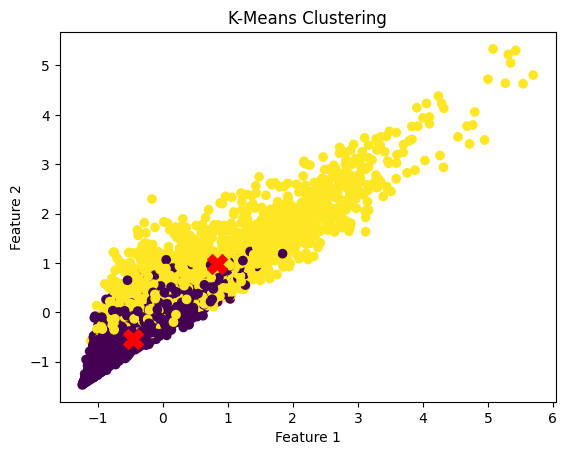

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(xtrain[:,0], xtrain[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Wrong It is only using 2 features


In [24]:
#Importing required modules
#Let's use pca
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(xtrain)
df.shape

(5891, 2)

In [28]:
type(df)

numpy.ndarray

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


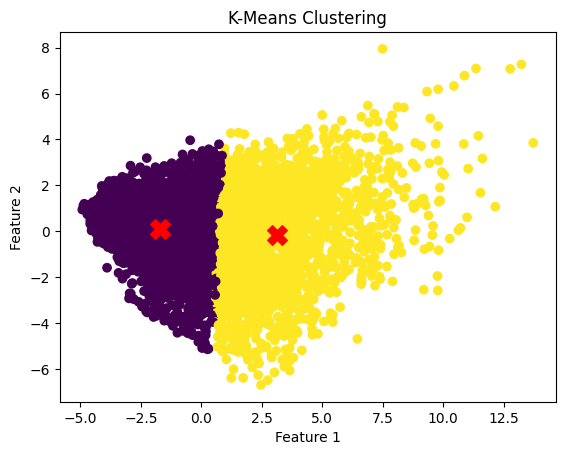

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df[:,0], df[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

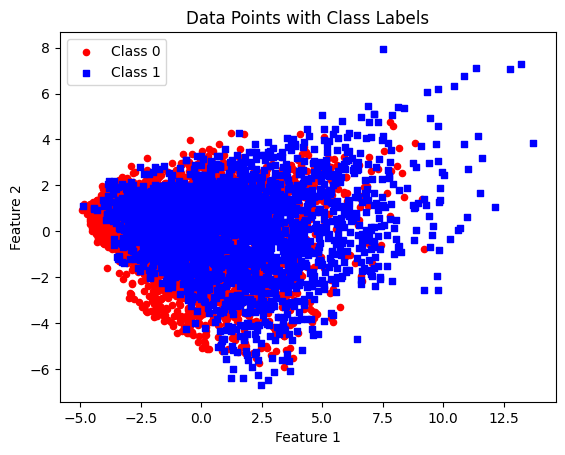

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data stored in the variable 'x_train' with shape (5891, 2)
# Assuming you have the corresponding classification labels in the variable 'y_train' with shape (5891,)

# Separate data points based on their class labels
class_0_points = df[ytrain == 0]
class_1_points = df[ytrain == 1]

# Plotting the data points
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o',s=20, label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='s',s=20, label='Class 1')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Class Labels')
plt.legend()

# Show the plot
plt.show()
